**Binary Classifications**

Found 7400 images belonging to 2 classes.
Found 1808 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


232/232 ━━━━━━━━━━━━━━━━━━━━ 6427s 28s/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 1557s 27s/step
Accuracy: 98.17%


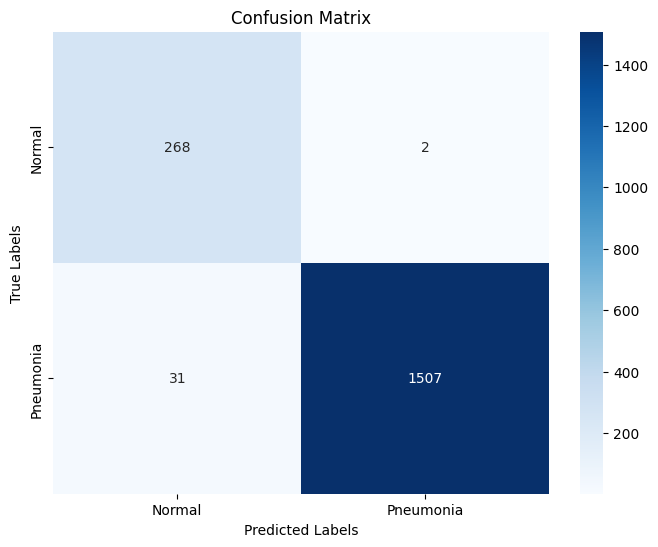

Precision: 98.34%
Recall: 98.17%
F1 Score: 98.21%
              precision    recall  f1-score   support

      Normal       0.90      0.99      0.94       270
   Pneumonia       1.00      0.98      0.99      1538

    accuracy                           0.98      1808
   macro avg       0.95      0.99      0.97      1808
weighted avg       0.98      0.98      0.98      1808



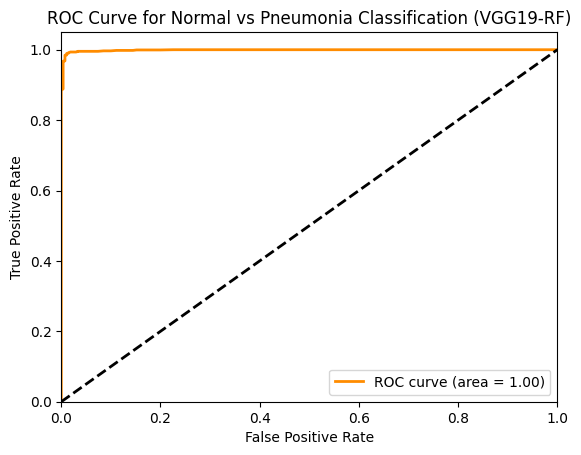

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, auc, roc_curve, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the train and test directories
train_dir = 'drive/MyDrive/PneumoniaDataset/Curated X-Ray Dataset/BinaryClassification/Normal_Pneumonia/train/'
test_dir = 'drive/MyDrive/PneumoniaDataset/Curated X-Ray Dataset/BinaryClassification/Normal_Pneumonia/test/'


# ImageDataGenerator to load and preprocess the images
datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Use 224x224 for EfficientNet
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Load the test data
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Load EfficientNet model pre-trained on ImageNet without the classification head
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Function to extract features
def extract_features(generator, model, batch_size):
    features = model.predict(generator, steps=generator.samples // batch_size + 1)
    return features

# Extract features for training and test sets
train_features = extract_features(train_generator, base_model, batch_size=32)
test_features = extract_features(test_generator, base_model, batch_size=32)

# Get the corresponding labels
train_labels = train_generator.classes
test_labels = test_generator.classes

# Reshape features for Random Forest input
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# Train RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features_flat, train_labels)

# Make predictions on the test set
y_pred = rf_classifier.predict(test_features_flat)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall, F1 Score
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Classification Report
print(classification_report(test_labels, y_pred, target_names=test_generator.class_indices.keys()))

# Predict probabilities for the test set
y_score = rf_classifier.predict_proba(test_features_flat)

# Compute ROC curve and ROC area for the binary class
fpr, tpr, _ = roc_curve(test_labels, y_score[:, 1])  # Get FPR and TPR for the positive class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Normal vs Pneumonia Classification (VGG19-RF)')
plt.legend(loc="lower right")
plt.show()


**Binary between Bacteria vs Viral**

Found 3328 images belonging to 2 classes.
Found 1329 images belonging to 2 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 2927s 28s/step


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1174s 28s/step
Accuracy: 86.00%


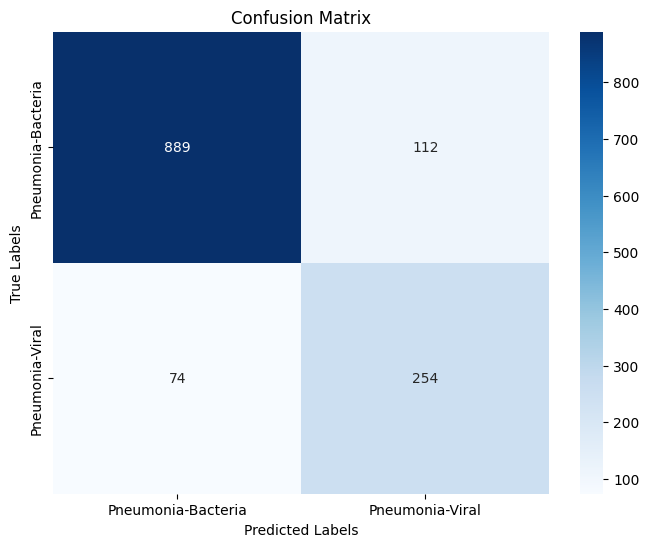

Precision: 86.66%
Recall: 86.00%
F1 Score: 86.25%
                    precision    recall  f1-score   support

Pneumonia-Bacteria       0.92      0.89      0.91      1001
   Pneumonia-Viral       0.69      0.77      0.73       328

          accuracy                           0.86      1329
         macro avg       0.81      0.83      0.82      1329
      weighted avg       0.87      0.86      0.86      1329



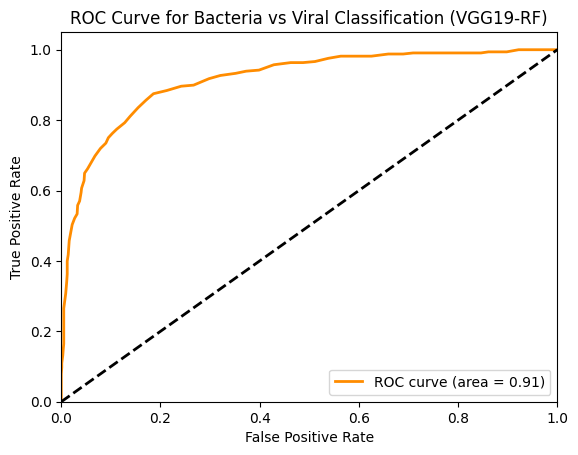

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, auc, roc_curve, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the train and test directories
train_dir = 'drive/MyDrive/PneumoniaDataset/Curated X-Ray Dataset/BinaryClassification/PneumoniaBacteria_PneumoniaViral/train/'
test_dir = 'drive/MyDrive/PneumoniaDataset/Curated X-Ray Dataset/BinaryClassification/PneumoniaBacteria_PneumoniaViral/test/'

# ImageDataGenerator to load and preprocess the images
datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Use 224x224 for EfficientNet
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Load the test data
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Load EfficientNet model pre-trained on ImageNet without the classification head
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Function to extract features
def extract_features(generator, model, batch_size):
    features = model.predict(generator, steps=generator.samples // batch_size + 1)
    return features

# Extract features for training and test sets
train_features = extract_features(train_generator, base_model, batch_size=32)
test_features = extract_features(test_generator, base_model, batch_size=32)

# Get the corresponding labels
train_labels = train_generator.classes
test_labels = test_generator.classes

# Reshape features for Random Forest input
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# Train RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features_flat, train_labels)

# Make predictions on the test set
y_pred = rf_classifier.predict(test_features_flat)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall, F1 Score
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Classification Report
print(classification_report(test_labels, y_pred, target_names=test_generator.class_indices.keys()))

# Predict probabilities for the test set
y_score = rf_classifier.predict_proba(test_features_flat)

# Compute ROC curve and ROC area for the binary class
fpr, tpr, _ = roc_curve(test_labels, y_score[:, 1])  # Get FPR and TPR for the positive class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bacteria vs Viral Classification (VGG19-RF)')
plt.legend(loc="lower right")
plt.show()

**Multiclass Categorizations of Pneumonia: Covid-19, Bacteria and Viral**

Found 4400 images belonging to 3 classes.
Found 1538 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 3905s 28s/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 1355s 28s/step
Accuracy: 79.84%


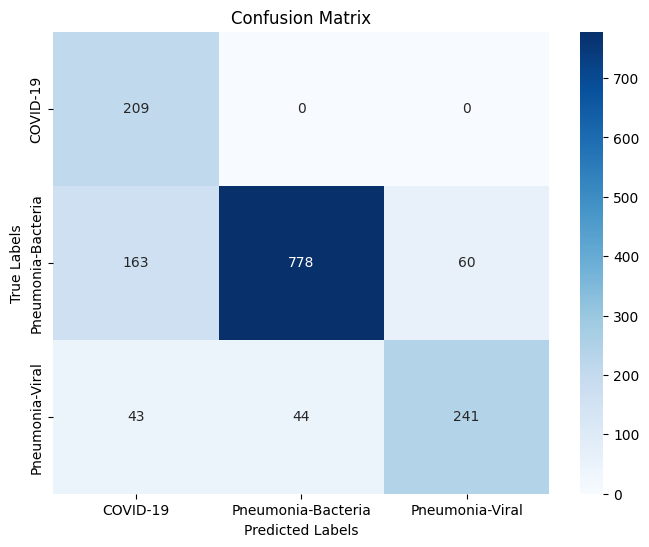

Precision: 85.52%
Recall: 79.84%
F1 Score: 81.00%
                    precision    recall  f1-score   support

          COVID-19       0.50      1.00      0.67       209
Pneumonia-Bacteria       0.95      0.78      0.85      1001
   Pneumonia-Viral       0.80      0.73      0.77       328

          accuracy                           0.80      1538
         macro avg       0.75      0.84      0.76      1538
      weighted avg       0.86      0.80      0.81      1538



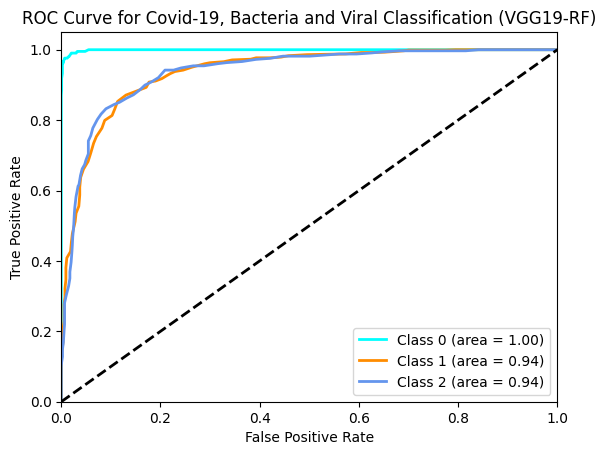

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, auc, roc_curve, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

# Paths to the train and test directories
train_dir = 'drive/MyDrive/PneumoniaDataset/Curated X-Ray Dataset/MultiClassClassification/PneumoniaClassesOnly/train/'
test_dir = 'drive/MyDrive/PneumoniaDataset/Curated X-Ray Dataset/MultiClassClassification/PneumoniaClassesOnly/test/'

# ImageDataGenerator to load and preprocess the images
datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Use 224x224 for EfficientNet
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Load the test data
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Load EfficientNet model pre-trained on ImageNet without the classification head
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Function to extract features
def extract_features(generator, model, batch_size):
    features = model.predict(generator, steps=generator.samples // batch_size + 1)
    return features

# Extract features for training and test sets
train_features = extract_features(train_generator, base_model, batch_size=32)
test_features = extract_features(test_generator, base_model, batch_size=32)

# Get the corresponding labels from the generators
train_labels = train_generator.classes
test_labels = test_generator.classes

# Reshape features to 2D array (flattened for Random Forest input)
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# Binarize labels for multi-class ROC
n_classes = len(train_generator.class_indices)
train_labels_bin = label_binarize(train_labels, classes=np.arange(n_classes))
test_labels_bin = label_binarize(test_labels, classes=np.arange(n_classes))

# Train RandomForest in One-vs-Rest fashion
rf_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_classifier.fit(train_features_flat, train_labels_bin)

# Make predictions on the test set
y_pred = rf_classifier.predict(test_features_flat)

# Calculate accuracy using argmax to get the predicted class labels
y_pred = np.argmax(y_pred, axis=1)
test_labels_max = np.argmax(test_labels_bin, axis=1)
accuracy = accuracy_score(test_labels_max, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy, Precision, Recall, F1 Score
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Classification Report
print(classification_report(test_labels, y_pred, target_names=test_generator.class_indices.keys()))

# Predict probabilities for the test set
y_score = rf_classifier.predict_proba(test_features_flat)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkred', 'darkgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Covid-19, Bacteria and Viral Classification (VGG19-RF)')
plt.legend(loc="lower right")
plt.show()